In [11]:
'''
We represent each sample used for generating the decision tree as a Training Instance

Each instance has the corresponding features: Pclass, Sex, Age, Siblings/Spouses Aboard, Parents/Children Aboard,
     Fare, and Survived
     
'''
class TrainingInstance:
    

    #Input: Pclass, Sex (gender), Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare, and Survived
    def __init__(self, p_class, sex, age, siblings_Spouses, parents_Children, fare, survived):
        self.p_class = p_class
        self.sex = sex
        self.age = age
        self.siblings_Spouses = siblings_Spouses
        self.parents_Children = parents_Children
        self.fare = fare
        self.survived = survived

    
    def __str__(self):
        return "p_class: {}, sex: {}, age: {}, sibling_spouses: {}, parents_children: {}, fare: {}, survived: {}".format(self.p_class, self.sex, self.age, self.siblings_Spouses, self.parents_Children, self.fare, self.survived)
    

In [12]:
'''
For a feature vector that we want a prediction for using the decision tree, we will represent it as a Test Instance
The difference from training instance is that we don't have the survived parameter in this case
'''
class TestInstance:
    
    #Input: Pclass, Sex (gender), Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare
     def __init__(self, p_class, sex, age, siblings_Spouses, parents_Children, fare):
        self.p_class = p_class
        self.sex = sex
        self.age = age
        self.siblings_Spouses = siblings_Spouses
        self.parents_Children = parents_Children
        self.fare = fare
    
     def __str__(self):
        return "p_class: {}, sex: {}, age: {}, sibling_spouses: {}, parents_children: {}, fare: {}".format(self.p_class, self.sex, self.age, self.siblings_Spouses, self.parents_Children, self.fare)
    

In [13]:
'''
min_max_norm is a method to apply min_max normalization to specific features in the dataset

Input: 1) df: dataframe containing the dataset

Output: normalized dataframe
'''
def min_max_norm(df):
    
    normalized_df = df.copy()
    
    for column in normalized_df.columns:
        
        normalized_df[column] = (normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min())
    
    return normalized_df

In [14]:
'''
compute_distance is a method to compute the euclidean distance between two instances

Input: 1) instance1: the first instance
  
       2) instance2: the second instance

Output: the euclidean distance between the two instances
'''
def compute_distance(instance1, instance2):
    
    eucledian_dist = math.sqrt(math.pow(instance1.p_class - instance2.p_class, 2)
                              + math.pow(instance1.sex - instance2.sex, 2) 
                              + math.pow(instance1.age - instance2.age, 2)
                              + math.pow(instance1.siblings_Spouses - instance2.siblings_Spouses, 2)
                              + math.pow(instance1.parents_Children - instance2.parents_Children, 2)
                              + math.pow(instance1.fare - instance2.fare, 2))
    
    return eucledian_dist
    

In [15]:
'''
weighted_nearest_neighbors is a method that is used for prediction:

Input: 1) train_instances: the list of train_instances

       2) sorted_dictionary: a sorted version of the dictionary above:
       
       3) k: the k value from KNN

Output: the prediction
'''
def weighted_nearest_neighbors(train_instances, sorted_dictionary, k):
    
    survived_weight = 0
    deceased_weight = 0
    
    
    i = 0
    
    for key in sorted_dictionary:
        
        if(i == k):
            break
        
        i+= 1
        
        train_instance = train_instances[key-1]
        
        if(train_instance.survived == 1):
            survived_weight += np.exp(-sorted_dictionary[key])
            
        else:
            deceased_weight += np.exp(-sorted_dictionary[key])
    
    
    if(survived_weight > deceased_weight):
        return 1
    else:
        return 0
    

In [16]:
'''
generate_dictionary is a function that creates a dictionary of the distance from
each training instance to the test instance

Input: 1) train_instances: a list of training instances
       2) test_instance: the test instance for which we want a prediction

Output: a dictionary of the distance between the training instances and test instance

'''
def generate_dictionary(train_instances, test_instance):
    
    dictionary = {}
    i = 1
    
    for elem in train_instances:
        dist = compute_distance(elem, test_instance)
        dictionary[i] = dist
        i += 1
    
    return dictionary
    

In [17]:
'''
sorted_dictionary is a function that sorts the dictionary of the distance
from each training instance to the test instance based on the distance

Input: 1) a dictionary ordered by the index of training instances

Output: a dictionary ordered by the distance between training instance and test instance
'''
def sort_dictionary(dictionary):
    
    sorted_dictionary = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1])}
    
    return sorted_dictionary

In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

'''
Load dataset
'''
df = pd.read_csv('titanic_data.csv')
df.rename(columns = {"Siblings/Spouses Aboard": "Siblings_Spouses_Aboard"}, inplace = True)
df.rename(columns = {"Parents/Children Aboard": "Parents_Children_Aboard"}, inplace = True)

#Apply Min-Max normalization to features
df_norm = min_max_norm(df)




In [19]:
'''
Code to generate training instances
'''

train_instances = []

for index, row in df_norm.iterrows():
    
    temp = TrainingInstance(row['Pclass'], row['Sex'], row['Age'], row['Siblings_Spouses_Aboard'], row['Parents_Children_Aboard'], row['Fare'], row['Survived'])
    train_instances.append(temp)

In [10]:
'''
Code for 5.1 c
'''

'\nCode for 5.1 c\n'

In [23]:
#Normalized test instance
test_instance = TestInstance(0, 0, 0.2712, 0, 0, 0.1469 )

#Generate Dictionary of distances from each training instance to test instance
dictionary = generate_dictionary(train_instances, test_instance)

#Sort dictionary based on distance
sorted_dictionary = sort_dictionary(dictionary)

#Perform KNN for K = 1,2,..., N
results = []
for i in range(887):
    results.append(weighted_nearest_neighbors(train_instances, sorted_dictionary, i+1))

#Index list for plotting
index = []
for i in range(887):
    index.append(i+1)

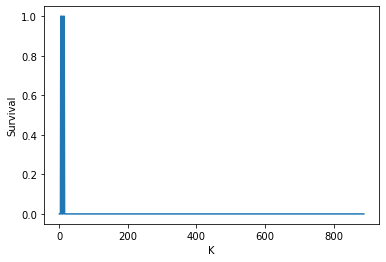

In [24]:
'''
Plot
'''
plt.xlabel('K')
plt.ylabel('Survival')
plt.plot(index, results)

In [25]:
#Predictions for K = 1,2,..,N
print(results)

[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
'''
Code for 5.1 d
'''

In [35]:
'''
balance_classes is a method that balance classes for each subset before applying cross-validation

Input: 1) the list of training instances

Output: a list that balances the instances


We know that 342 survived and 545 died
In CV we'll use 9 subsets with 89 samples and one with 86

For the 9 subsets with 89 samples we'll have:

34 instances of survived
55 instances of death

For the 1 subset with 86 samples we'll have 

36 instances of survived
50 instances of death

'''
def balance_classes(instances):
    
    survived = []
    deceased = []
    
    for elem in instances:
        
        if (elem.survived == 1):
            survived.append(elem)
        else:
            deceased.append(elem)
    
    
    temp = []
    survived_index = 0
    death_index = 0
    
    #First 9 susbsets
    for i in range(9):
        
        for j in range(34):
            temp.append(survived[survived_index])
            survived_index += 1
            
        
        for k in range(55):
            
            temp.append(deceased[death_index])
            death_index += 1
    
    
    
    #Last subset
    for j in range(36):
        temp.append(survived[survived_index])
        survived_index+=1
    
    for k in range(50):
        temp.append(deceased[death_index])
        death_index += 1
    
    
    return temp

In [39]:
'''
compute_accuracy is a function that computes KNN's prediction accuracy over the test set

Input: 1) train_instances: a list of train_instances
       
       2) subset: the test set
       
       3) k - value of k

Output: the prediction accuracy
'''
def compute_accuracy(train_instances, subset, k):
    
    num_correct = 0
    
    for elem in subset:
        
        dictionary = generate_dictionary(train_instances, elem)
        sorted_dict = sort_dictionary(dictionary)
        prediction = weighted_nearest_neighbors(train_instances, sorted_dict, k)
        
        if(prediction == elem.survived):
            num_correct += 1
    
    
    return float(num_correct)/ float(len(subset))

In [40]:
'''
cross_validation is a method that performs 10-fold cross validation 

Input: 1) instances - the list of instances on which we will perform CV

       2) k - the value of k for which we want to perform CV

Output: the average accuracy of 10-fold cross validation
'''
def cross_validation(instances, k):
    
    #Divide into 10 subsets 
    subset_1 = []
    subset_2 = []
    subset_3 = []
    subset_4 = []
    subset_5 = []
    subset_6 = []
    subset_7 = []
    subset_8 = []
    subset_9 = []
    subset_10 = []
    
    #Since there are 887 samples we'll have 9 subsets that have 89 samples and 1 that has 86
    temp = []
    
    #Call balance_classes method (defined in next cell)
    balanced_dist = balance_classes(instances)
    
   
    
    for i in range(len(balanced_dist)):
        
        if(i < 89):
            subset_1.append(balanced_dist[i])
        elif(i < 178):
            subset_2.append(balanced_dist[i])
        elif(i < 267):
            subset_3.append(balanced_dist[i])
        elif(i < 356):
            subset_4.append(balanced_dist[i])
        elif(i < 445):
            subset_5.append(balanced_dist[i])
        elif(i < 534):
            subset_6.append(balanced_dist[i])
        elif(i < 623):
            subset_7.append(balanced_dist[i])
        elif(i < 712):
            subset_8.append(balanced_dist[i])
        elif(i < 801):
            subset_9.append(balanced_dist[i])
        else:
            subset_10.append(balanced_dist[i])
    
    
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 1
    for i in range(89):
        del temp[0]
    
    
    
    
    
    #compute accuracy using subset 1 (compute_accuracy defined in next cell)
    accuracy1 = compute_accuracy(temp, subset_1, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 2
    for i in range(89):
        del temp[89]
        

    
    #compute accuracy using subset 2
    accuracy2 = compute_accuracy(temp, subset_2, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 3
    for i in range(89):
        del temp[178]
        
   
    
    #compute accuracy using subset 3
    accuracy3 = compute_accuracy(temp, subset_3, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
   
    #drop subset 4
    for i in range(89):
        del temp[267]
    
  
    
    #compute accuracy using subset 4
    accuracy4 = compute_accuracy(temp, subset_4, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 5
    for i in range(89):
        del temp[356]
        
    
    #compute accuracy using subset 5
    accuracy5 = compute_accuracy(temp, subset_5, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
        
    #drop subset 6
    for i in range(89):
        del temp[445]
        
    
    #compute accuracy using subset 6
    accuracy6 = compute_accuracy(temp, subset_6, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 7
    for i in range(89):
        del temp[534]
    
    
    #compute accuracy using subset 7
    accuracy7 = compute_accuracy(temp, subset_7, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 8
    for i in range(89):
        del temp[623]
    
   
    #compute accuracy using subset 8
    accuracy8 = compute_accuracy(temp, subset_8, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
      
    #drop subset 9
    for i in range(89):
        del temp[712]
        
   
    #compute accuracy using subset 9
    accuracy9 = compute_accuracy(temp, subset_9, k)
    
    
    temp = []
    for element in balanced_dist:
        temp.append(element)
    
    #drop subset 10
    for i in range(86):
        del temp[801]
    
    
    #compute accuracy using subset 10
    accuracy10 = compute_accuracy(temp, subset_10, k)
    
    #compute average accuracy
    total_accuracy = (accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5 + accuracy6 + accuracy7 + accuracy8 + accuracy9 + accuracy10) / 10
    
    
    return total_accuracy

In [47]:
#Index list for plotting
index2 = []
for i in range(790):
    index2.append(i+1)

    
#Since we are using 10-fold CV, I'll set the max K to 790 (nearly 90% of number of instances)

#Perform 10-fold CV for K=1,2,..,790
validation_results = []

for i in range(790):
    
    validation_results.append(cross_validation(train_instances, i+1))

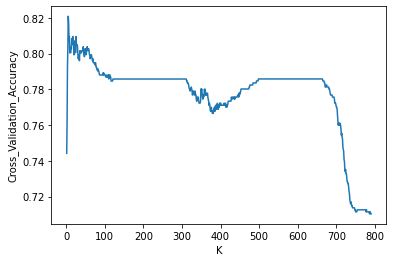

In [48]:
'''
Plot
'''
plt.xlabel('K')
plt.ylabel('Cross_Validation_Accuracy')
plt.plot(index2, validation_results)